<a href="https://colab.research.google.com/github/Carlosmagnobrusil/StockX_sale_price_prediction-/blob/main/StockX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Estudio de variacion de los precios**
## *Creado por: Carlos Brusil*



*   Fecha de Creación: 21 de febrero de 2022 
*   Fechad de actualización: 22 de febrero de 2022
*   Descripción: En el presente script se busca trabajar la base de datos de Sock X una tienda en linea de reventa de zapatos, la cual busca reponder cuales son las variables que determinan el precio de reventa.

In [146]:
from google.colab import drive
drive.mount('/content/drive') # uno my Drive al nuevo cuaderno

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
import pandas as pd #importo la libreria panda permite manipular y molderar los datos 
import numpy as np #importo la libreria numpy manipular y molderar los datos 
import matplotlib.pyplot as plt #importo libreria matplotlib que es una libreria que me permite realizar graficas en 2 dimensiones de de mis datos
import seaborn as sns #Esta libreria nos permite modificar la vizualizacion de los datos atraves de los coleres y mejorar presetancion de los mismo 

## Carga de datos 

In [148]:
stock =  '/content/drive/MyDrive/Coding_Dojo/Proyecto 2 /Data/StockX-Data-Contest-2019-3.csv' #Nombro a la base
stockx_df = pd.read_csv(stock) #le doy un nombre a la trama tener en cuenta que tipo dearchivo estoy leyendo
stockx_df #Observo que los datos hayan sido leidos de forma correcta

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$565,$220,12/26/18,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$598,$220,12/26/18,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$605,$220,12/26/18,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$650,$220,12/26/18,11.0,California


## Exploración de la base 

In [149]:
stockx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


In [150]:
stockx_df.columns= stockx_df.columns.str.lower()#primero defino a todos los nombres de las columnas en letra minuscula

In [151]:
stockx_df.columns = stockx_df.columns.str.replace(' ', '_') #en esta linea realizo el cambio de los espacios del nombre de las columnas por 
#el '_' 

In [152]:
stockx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_date    99956 non-null  object 
 1   brand         99956 non-null  object 
 2   sneaker_name  99956 non-null  object 
 3   sale_price    99956 non-null  object 
 4   retail_price  99956 non-null  object 
 5   release_date  99956 non-null  object 
 6   shoe_size     99956 non-null  float64
 7   buyer_region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


In [153]:
stockx_df['brand'].unique()

array([' Yeezy', 'Off-White'], dtype=object)

In [154]:
stockx_df['sneaker_name'].unique()

array(['Adidas-Yeezy-Boost-350-Low-V2-Beluga',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Green',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-White',
       'Adidas-Yeezy-Boost-350-V2-Cream-White',
       'Adidas-Yeezy-Boost-350-V2-Zebra',
       'Adidas-Yeezy-Boost-350-Low-Moonrock', 'Nike-Air-Max-90-Off-White',
       'Nike-Air-Presto-Off-White', 'Nike-Air-VaporMax-Off-White',
       'Air-Jordan-1-Retro-High-Off-White-Chicago',
       'Nike-Blazer-Mid-Off-White',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016',
       'Adidas-Yeezy-Boost-350-Low-Oxford-Tan',
       'Adidas-Yeezy-Boost-350-Low-Turtledove',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015',
       'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow',
       'Nike-Air-Force-1-Low-Off-White', 'Nike-Air-Max-97-Off-White',
       'Nike-Air-Force-1-Low-Virgil

In [155]:
number_of_siluettes = len(stockx_df['sneaker_name'].unique())
print("Numero de Siluetas  que existen en la base de datos:", number_of_siluettes)

Numero de Siluetas  que existen en la base de datos: 50


##### Durante la priemra explaración se ha tomado un pequeño vistazo a la base, esta base parce bastante limpia ya que no cuenta con valores perdidos, además se revisa dos de las varables mas importantes dentro del **"Sneaker Game"** es decir el mecado de reventa de zapatos, estas son la marca donde se devela que el estudio solo cuenta con dos marcas y estas son NIKE en su colaboración con la marca OFF WHITE del difunto diseñador Virgil Abloh y Adidas con su marca YEZZY del rapero y diseñador Kayne West dos iconos de la cultura pop en los ultimos años. dentro de esto podemos observar que la marca Nike cuenta con su coleccion de 10 y Adidas con la silueta Yezzy 350 en sus diferentes color ways. 

##### Para mayor informacion podemos revisar los siguientes Links 
* https://www.farfetch.com/uk/style-guide/how-to/the-history-of-the-yeezy-boost-350/

* https://www.nssmag.com/en/fashion/12262/virgil-abloh-explains-the-off-white-x-nike-collection-the-ten
  

In [156]:
prices = ['retail_price',"sale_price"]

for p in prices:
    stockx_df[p] = stockx_df[p].str.replace('$','')
    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [157]:
prices = ['retail_price',"sale_price"]

for p in prices:
    stockx_df[p] = stockx_df[p].str.replace(',','')
    

In [158]:
prices = ['retail_price',"sale_price"]

for p in prices:
    stockx_df[p] = stockx_df[p].astype(str).astype(int)

In [159]:
dates = ["order_date","release_date"]

for d in dates:
    stockx_df[d] = stockx_df[d].astype("datetime64")

In [160]:
categoricals = ["brand", "sneaker_name", "buyer_region" ]

for c in categoricals:
  stockx_df[c] = stockx_df[c].astype('category')

In [161]:
stockx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_date    99956 non-null  datetime64[ns]
 1   brand         99956 non-null  category      
 2   sneaker_name  99956 non-null  category      
 3   sale_price    99956 non-null  int64         
 4   retail_price  99956 non-null  int64         
 5   release_date  99956 non-null  datetime64[ns]
 6   shoe_size     99956 non-null  float64       
 7   buyer_region  99956 non-null  category      
dtypes: category(3), datetime64[ns](2), float64(1), int64(2)
memory usage: 4.1 MB


## Primeras impresiones 

In [162]:
round(stockx_df.groupby(["brand","sneaker_name"])["sale_price"].mean(),2) #ojo revisar esta clasificación 

brand      sneaker_name                                
 Yeezy     Adidas-Yeezy-Boost-350-Low-Moonrock              996.71
           Adidas-Yeezy-Boost-350-Low-Oxford-Tan           1011.51
           Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015     895.09
           Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016     984.24
           Adidas-Yeezy-Boost-350-Low-Turtledove           1531.66
                                                            ...   
Off-White  Nike-Zoom-Fly-Off-White-Black-Silver             316.69
           Nike-Zoom-Fly-Off-White-Pink                     271.17
           adidas-Yeezy-Boost-350-V2-Butter                    NaN
           adidas-Yeezy-Boost-350-V2-Static                    NaN
           adidas-Yeezy-Boost-350-V2-Static-Reflective         NaN
Name: sale_price, Length: 100, dtype: float64

In [163]:
round(stockx_df.groupby(["brand"])["retail_price"].mean(),2)

brand
 Yeezy       219.87
Off-White    179.38
Name: retail_price, dtype: float64

In [164]:
Yeezy = 219.87
OffWhite = 179.38
x = Yeezy - OffWhite 
y = np.around((x / OffWhite)*100,2)
print("La diferencia de precios de salida de Yeezy supera a Off-White en ", y ,"%")

La diferencia de precios de salida de Yeezy supera a Off-White en  22.57 %


In [165]:
round(stockx_df.groupby(["brand"])["sale_price"].mean(),2)

brand
 Yeezy       360.03
Off-White    671.48
Name: sale_price, dtype: float64

In [166]:
Yeezys = 360.03
OffWhites = 671.48
x1 =  OffWhites - Yeezys
y1 = np.around((x1 / Yeezys )*100,2)
print("La diferencia de precios de salida de Yeezy supera a Off-White en ", y1 ,"%")

La diferencia de precios de salida de Yeezy supera a Off-White en  86.51 %


##### Dentro de esta exploracion preliminar encontramos que la marca Yezzy tiene un precio de salida mayor al de Off-White, con un 22.57% de diferencia, sin embargo, el publico paga mas en reventa por un par Off-white con una diferencia del 86.51%

### Graficos de las primeras impresiones 

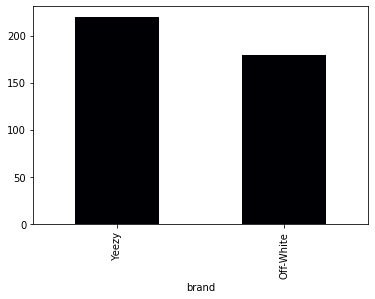

In [167]:
round(stockx_df.groupby(["brand"])["retail_price"].mean(),2).plot(kind = "bar", colormap = "inferno")

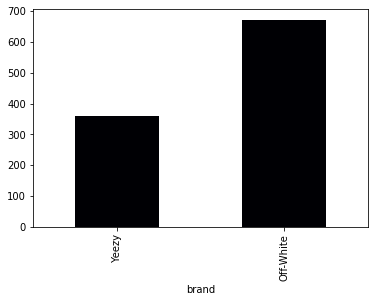

In [168]:
round(stockx_df.groupby(["brand"])["sale_price"].mean(),2).plot(kind = "bar", colormap = "inferno")

## Manipulación de la base 

In [169]:
#separo mis base la columna snaker name 
stockx_df1 = stockx_df.copy()
stockx_df1['sneaker_name'] = stockx_df1['sneaker_name'].str.upper() #convierto todos los nombres de mi columna en mayusculas 


In [170]:
stockx_df1.head(5)

,order_date,brand,sneaker_name,sale_price,retail_price,release_date,shoe_size,buyer_region
0,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-LOW-V2-BELUGA,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-COPPER,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-GREEN,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-RED,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-RED-2017,828,220,2017-02-11,11.0,Rhode Island


In [171]:
stockx_df1 = stockx_df1['sneaker_name'].str.split('-',expand = True) #divido el nomebre de mi 

In [172]:
stockx_df1

,0,1,2,3,4,5,6,7,8,9
0,ADIDAS,YEEZY,BOOST,350,LOW,V2,BELUGA,None,None,None
1,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,COPPER,None,None
2,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,GREEN,None,None
3,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,RED,None,None
4,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,RED,2017,None
...,...,...,...,...,...,...,...,...,...,...
99951,ADIDAS,YEEZY,BOOST,350,V2,STATIC,REFLECTIVE,None,None,None
99952,ADIDAS,YEEZY,BOOST,350,V2,STATIC,REFLECTIVE,None,None,None
99953,ADIDAS,YEEZY,BOOST,350,V2,STATIC,REFLECTIVE,None,None,None
99954,ADIDAS,YEEZY,BOOST,350,V2,STATIC,REFLECTIVE,None,None,None


In [173]:
stockx_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       99956 non-null  object
 1   1       99956 non-null  object
 2   2       99956 non-null  object
 3   3       99956 non-null  object
 4   4       99956 non-null  object
 5   5       97899 non-null  object
 6   6       60228 non-null  object
 7   7       18053 non-null  object
 8   8       6811 non-null   object
 9   9       31 non-null     object
dtypes: object(10)
memory usage: 7.6+ MB


In [174]:
stockx_df1[0].unique()

array(['ADIDAS', 'NIKE', 'AIR'], dtype=object)

In [175]:
stockx_df1[1].unique()

array(['YEEZY', 'AIR', 'JORDAN', 'BLAZER', 'REACT', 'ZOOM'], dtype=object)

In [176]:
stockx_df1.rename(columns={0:"main_brand", 1:"label", 3:"silhouette",4: "colorway"})


,main_brand,label,2,silhouette,colorway,5,6,7,8,9
0,ADIDAS,YEEZY,BOOST,350,LOW,V2,BELUGA,None,None,None
1,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,COPPER,None,None
2,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,GREEN,None,None
3,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,RED,None,None
4,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,RED,2017,None
...,...,...,...,...,...,...,...,...,...,...
99951,ADIDAS,YEEZY,BOOST,350,V2,STATIC,REFLECTIVE,None,None,None
99952,ADIDAS,YEEZY,BOOST,350,V2,STATIC,REFLECTIVE,None,None,None
99953,ADIDAS,YEEZY,BOOST,350,V2,STATIC,REFLECTIVE,None,None,None
99954,ADIDAS,YEEZY,BOOST,350,V2,STATIC,REFLECTIVE,None,None,None


In [177]:
stockx_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       99956 non-null  object
 1   1       99956 non-null  object
 2   2       99956 non-null  object
 3   3       99956 non-null  object
 4   4       99956 non-null  object
 5   5       97899 non-null  object
 6   6       60228 non-null  object
 7   7       18053 non-null  object
 8   8       6811 non-null   object
 9   9       31 non-null     object
dtypes: object(10)
memory usage: 7.6+ MB


In [178]:
print('\n','*'*50,'\n Marcas :', stockx_df1[0].unique(),'\n','*'*50,
      '\n','*'*50,'\n Colaboración :', stockx_df1[1].unique(),'\n','*'*50,
      '\n','*'*50,'\n Siluetas :',stockx_df1[2].unique(),'\n','*'*50,
      '\n','*'*50,'\n Colores :',stockx_df1[3].unique(),'\n','*'*50,
      '\n','*'*50,'\n Otro1 :',stockx_df1[4].unique(),'\n','*'*50,
      '\n','*'*50,'\n Otro2 :',stockx_df1[5].unique(),'\n','*'*50,
      '\n','*'*50,'\n Otro3 :',stockx_df1[6].unique(),'\n','*'*50,
      '\n','*'*50,'\n Otro4 :',stockx_df1[7].unique(),'\n','*'*50,
      '\n','*'*50,'\n Otro5 :',stockx_df1[8].unique(),'\n','*'*50,
      '\n','*'*50,'\n Otro6 :',stockx_df1[9].unique(),'\n','*'*50,)


 ************************************************** 
 Marcas : ['ADIDAS' 'NIKE' 'AIR'] 
 ************************************************** 
 ************************************************** 
 Colaboración : ['YEEZY' 'AIR' 'JORDAN' 'BLAZER' 'REACT' 'ZOOM'] 
 ************************************************** 
 ************************************************** 
 Siluetas : ['BOOST' 'MAX' 'PRESTO' 'VAPORMAX' '1' 'MID' 'FORCE' 'HYPERDUNK' 'FLY'] 
 ************************************************** 
 ************************************************** 
 Colores : ['350' '90' 'OFF' 'RETRO' '1' '97' '2017' 'MERCURIAL'] 
 ************************************************** 
 ************************************************** 
 Otro1 : ['LOW' 'V2' 'OFF' 'WHITE' 'HIGH' 'FLYKNIT'] 
 ************************************************** 
 ************************************************** 
 Otro2 : ['V2' 'CORE' 'CREAM' 'ZEBRA' 'MOONROCK' 'WHITE' None 'OFF' 'PIRATE'
 'OXFORD' 'TURTLEDOVE' 'SEMI' 'V

In [179]:
stockx_df1[0] = stockx_df1[0].apply(lambda b:'NIKE' if b == 'AIR' or b == 'NIKE' else 'ADIDAS')

In [180]:
print('\n','*'*50,'\n Marcas :', stockx_df1[0].unique(),'\n','*'*50)


 ************************************************** 
 Marcas : ['ADIDAS' 'NIKE'] 
 **************************************************


In [184]:
stockx_df1 = stockx_df1.assign(colaboration = stockx_df1[1].apply(lambda c:'YEEZY' if c== 'YEEZY' else 'OFF-WITHE'))
stockx_df1.head(5)

,0,1,2,3,4,5,6,7,8,9,colaboration
0,ADIDAS,YEEZY,BOOST,350,LOW,V2,BELUGA,None,None,None,YEEZY
1,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,COPPER,None,None,YEEZY
2,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,GREEN,None,None,YEEZY
3,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,RED,None,None,YEEZY
4,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,RED,2017,None,YEEZY


In [186]:
print('\n','*'*50,'\n Marcas :', stockx_df1['colaboration'].unique(),'\n','*'*50)


 ************************************************** 
 Marcas : ['YEEZY' 'OFF-WITHE'] 
 **************************************************
